This dataset is created using the ideology of **Inceoglu et. al (2018)**.

**Link to the paper:** https://doi.org/10.3847/1538-4357/aac81e

**Title of paper:** Using Machine Learning Methods to Forecast if Solar Flares
Will Be Associated with CMEs and SEPs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Taking all three in the data

In [2]:
only_flares = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_flares_36.csv")
flare_linked = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/flare_linked_36.csv")
only_cme = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_cme_36.csv")

In [3]:
data = pd.concat([only_flares,flare_linked,only_cme])
data = data.iloc[:,0:18]
ydata = pd.Series(np.concatenate((np.zeros(only_flares.shape[0]), np.ones(flare_linked.shape[0]), np.full(only_cme.shape[0], 2))))
columns = data.columns
data.reset_index(drop=True,inplace=True)

In [4]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,1.748676e+22,86.809,-0.005398,6107.613,20.115,974.343,37.806,-0.014116,37.002,87.949,-0.262190,1.906497e+13,3.886959e+12,2.221003e+23,30.611,427.937958,3.821,147.800
1,8.635886e+21,145.208,0.001882,3380.575,7.040,680.337,72.200,0.005321,34.328,144.410,0.482515,1.350948e+13,3.217496e+12,5.720140e+22,24.878,709.764587,3.426,23.975
2,2.208835e+22,77.458,0.003189,7058.576,21.203,1125.812,35.493,0.007476,36.119,83.284,-0.452133,2.088871e+13,7.186058e+12,2.921531e+23,28.830,564.053101,4.190,99.387
3,6.968897e+21,113.469,-0.002469,3649.218,10.467,464.259,53.387,-0.006300,32.995,120.948,-0.016955,9.377741e+12,2.097685e+12,4.741158e+22,27.293,199.341080,3.947,24.150
4,4.942875e+21,125.390,0.008944,5757.768,29.832,451.349,77.005,0.020892,49.604,125.230,0.113630,8.694789e+12,3.387658e+12,5.903152e+22,37.851,232.700699,3.404,69.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,1.815851e+22,64.404,-0.003391,12641.640,41.634,935.366,36.015,-0.006722,48.079,70.007,0.047142,1.781701e+13,2.268481e+12,4.573231e+23,41.021,513.920776,4.048,92.361
462,2.218802e+22,91.848,-0.005798,8562.980,29.102,1448.619,43.979,-0.013254,42.005,99.273,0.012779,2.926910e+13,6.310746e+12,3.827934e+23,36.053,720.935486,4.309,195.163
463,1.676506e+22,79.617,0.000515,3961.727,11.552,882.037,36.019,0.001302,31.858,82.634,-0.333858,1.557948e+13,4.127173e+12,1.263408e+23,25.484,361.408325,3.815,12.376
464,1.334912e+21,112.132,0.001759,3011.505,2.839,109.509,53.827,0.003823,30.800,111.477,0.648437,1.581656e+12,5.700270e+11,6.902982e+21,21.632,19.281916,2.790,3.036


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

xdata = pd.DataFrame(scaled_data, columns=columns)

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(xdata)
b = np.array(ydata)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[19.29592169  0.72635149  0.74729541 20.26329403 24.84215483 28.06863127
 21.59752812  0.2796538  25.33842745  2.7918095   0.56077412 28.13934763
 22.74212808 19.9763624  24.82430365 21.36078581 42.180598   17.4050244 ]


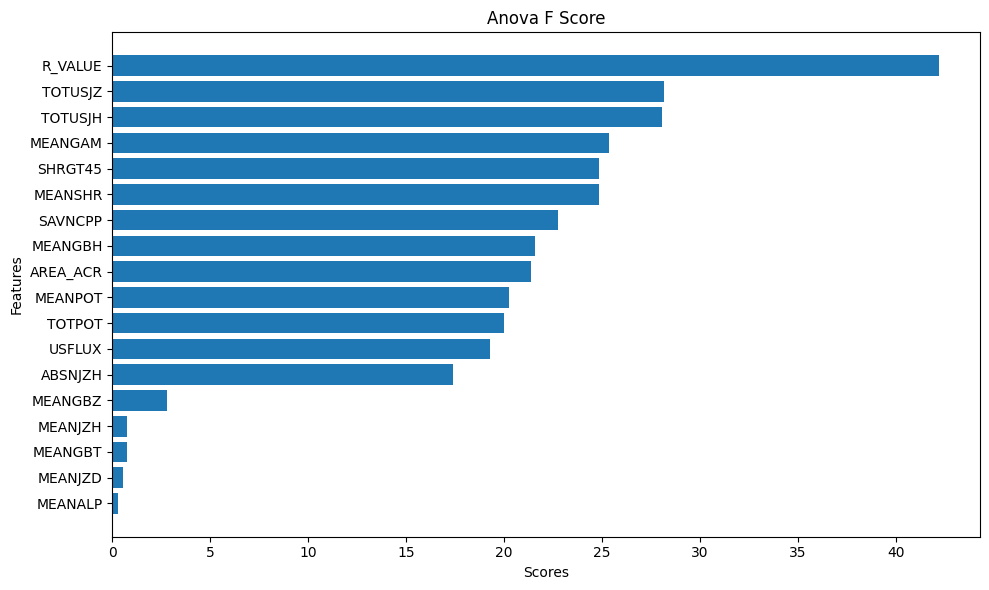

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [8]:
xdata_reordered = xdata.loc[:, ordered_features]

In [9]:
only_flares_1 = pd.DataFrame(xdata_reordered[ydata == 0])
flare_linked_1 = pd.DataFrame(xdata_reordered[ydata == 1])
only_cme_1 = pd.DataFrame(xdata_reordered[ydata == 2])

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plotno = 1
columns_1 = xdata_reordered.columns
plt.figure(figsize=(36, 80),dpi =300)

min_only_flares_1 = only_flares_1.index.min()
max_only_flares_1 = only_flares_1.index.max()
only_flares_1['normalized_event_number'] = (only_flares_1.index - min_only_flares_1) / (max_only_flares_1 - min_only_flares_1)

min_flare_linked_1 = flare_linked_1.index.min()
max_flare_linked_1 = flare_linked_1.index.max()
flare_linked_1['normalized_event_number'] = (flare_linked_1.index - min_flare_linked_1) / (max_flare_linked_1 - min_flare_linked_1)

min_only_cme_1 = only_cme_1.index.min()
max_only_cme_1 = only_cme_1.index.max()
only_cme_1['normalized_event_number'] = (only_cme_1.index - min_only_cme_1) / (max_only_cme_1 - min_only_cme_1)

for i in range(len(columns_1) - 1):
    mean_only_flares_1 = np.mean(only_flares_1.iloc[:, i])
    mean_flare_linked_1 = np.mean(flare_linked_1.iloc[:, i])
    mean_only_cme_1 = np.mean(only_cme_1.iloc[:, i])
    std_only_flares_1 = np.std(only_flares_1.iloc[:,i])
    std_flare_linked_1 = np.std(flare_linked_1.iloc[:,i])
    std_only_cme_1 = np.std(only_cme_1.iloc[:,i])

    plt.subplot(len(columns_1), 4, plotno)
    plt.scatter(only_flares_1["normalized_event_number"], only_flares_1.iloc[:, i], alpha=0.7, label="Confined Flares")
    plt.scatter(flare_linked_1["normalized_event_number"], flare_linked_1.iloc[:, i], alpha=0.7, label="Eruptive Flares")
    plt.scatter(only_cme_1["normalized_event_number"], only_cme_1.iloc[:, i], alpha=0.7, label="Flareless CMEs")
    plt.axhline(mean_only_flares_1, color='b', label=f"$\\mu$ Confined: {mean_only_flares_1:.2f}")
    plt.axhline(mean_flare_linked_1, color='r', label=f"$\\mu$ Eruptive: {mean_flare_linked_1:.2f}")
    plt.axhline(mean_only_cme_1, color='g', label=f"$\\mu$ Flareless: {mean_only_cme_1:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(columns_1[i])
    plt.title(f"{columns_1[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns_1), 4, plotno + 1)
    plt.hist(only_flares_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Confined Flares")
    plt.hist(only_cme_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Flareless CMEs")
    plt.axvline(mean_only_flares_1, color='b', label=f"$\\mu$ Confined flare: {mean_only_flares_1:.2f}")
    plt.axvline(mean_only_cme_1, color='g', label=f"$\\mu$ Flareless CME: {mean_only_cme_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_only_flares_1 - std_only_flares_1, mean_only_flares_1 + std_only_flares_1, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_only_cme_1 - std_only_cme_1, mean_only_cme_1 + std_only_cme_1, color='g', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plt.subplot(len(columns_1), 4, plotno + 2)
    plt.hist(only_flares_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Confined Flares")
    plt.hist(flare_linked_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Eruptive Flares")
    plt.axvline(mean_only_flares_1, color='b', label=f"$\\mu$ Confined flare: {mean_only_flares_1:.2f}")
    plt.axvline(mean_flare_linked_1, color='r', label=f"$\\mu$ Eruptive flare: {mean_flare_linked_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_only_flares_1 - std_only_flares_1, mean_only_flares_1 + std_only_flares_1, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_flare_linked_1 - std_flare_linked_1, mean_flare_linked_1 + std_flare_linked_1, color='r', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plt.subplot(len(columns_1), 4, plotno + 3)
    plt.hist(flare_linked_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Eruptive Flares")
    plt.hist(only_cme_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="$\\sigma$ Flareless CMEs")
    plt.axvline(mean_flare_linked_1, color='r', label=f"$\\mu$ Eruptive flare : {mean_flare_linked_1:.2f}")
    plt.axvline(mean_only_cme_1, color='g', label=f"$\\mu$ Flareless CME: {mean_only_cme_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_flare_linked_1 - std_flare_linked_1, mean_flare_linked_1 + std_flare_linked_1, color='r', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_only_cme_1 - std_only_cme_1, mean_only_cme_1 + std_only_cme_1, color='g', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plotno += 4

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Taking only flares data (Eruptive and Confined)

In [11]:
only_flares = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_flares_36.csv")
flare_linked = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/flare_linked_36.csv")

In [12]:
data = pd.concat([only_flares,flare_linked])
data = data.iloc[:,0:18]
ydata = pd.Series(np.concatenate((np.zeros(only_flares.shape[0]), np.ones(flare_linked.shape[0]))))
columns = data.columns
data.reset_index(drop=True,inplace=True)

In [13]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,1.748676e+22,86.809,-0.005398,6107.613,20.115,974.343,37.806,-0.014116,37.002,87.949,-0.262190,1.906497e+13,3.886959e+12,2.221003e+23,30.611,427.937958,3.821,147.800
1,8.635886e+21,145.208,0.001882,3380.575,7.040,680.337,72.200,0.005321,34.328,144.410,0.482515,1.350948e+13,3.217496e+12,5.720140e+22,24.878,709.764587,3.426,23.975
2,2.208835e+22,77.458,0.003189,7058.576,21.203,1125.812,35.493,0.007476,36.119,83.284,-0.452133,2.088871e+13,7.186058e+12,2.921531e+23,28.830,564.053101,4.190,99.387
3,6.968897e+21,113.469,-0.002469,3649.218,10.467,464.259,53.387,-0.006300,32.995,120.948,-0.016955,9.377741e+12,2.097685e+12,4.741158e+22,27.293,199.341080,3.947,24.150
4,4.942875e+21,125.390,0.008944,5757.768,29.832,451.349,77.005,0.020892,49.604,125.230,0.113630,8.694789e+12,3.387658e+12,5.903152e+22,37.851,232.700699,3.404,69.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,4.181662e+22,103.192,-0.068453,21951.770,50.326,6618.145,73.144,-0.099461,53.650,120.155,-0.228447,8.171549e+13,9.102882e+13,1.580642e+24,47.051,1559.338379,5.152,3711.461
353,4.533103e+22,110.105,-0.036974,21630.710,47.170,7357.481,76.954,-0.061903,51.792,126.385,-0.313275,1.005717e+14,7.837173e+13,1.764815e+24,45.785,1717.884888,5.305,2271.374
354,4.926550e+22,108.463,-0.057003,19179.240,42.577,7444.161,73.292,-0.083485,49.545,123.547,-0.230685,9.362396e+13,9.320960e+13,1.599623e+24,43.165,1757.873413,5.294,3579.857
355,5.263238e+22,104.241,-0.050108,19214.290,41.237,7474.539,69.445,-0.073877,47.951,118.697,-0.024904,9.687235e+13,8.318248e+13,1.693337e+24,41.954,1807.806030,5.236,3325.148


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

xdata = pd.DataFrame(scaled_data, columns=columns)

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(xdata)
b = np.array(ydata)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[7.24474232e+00 1.63551525e+00 5.64194566e-03 1.71426188e+00
 2.23204446e-01 1.01401008e+01 3.91149401e+00 4.83778815e-02
 7.51747650e-01 3.35200587e+00 6.91921992e-02 9.77746524e+00
 3.41946348e+00 9.54594041e+00 4.62721632e-01 6.89199857e+00
 1.09582885e+00 2.61783538e+00]


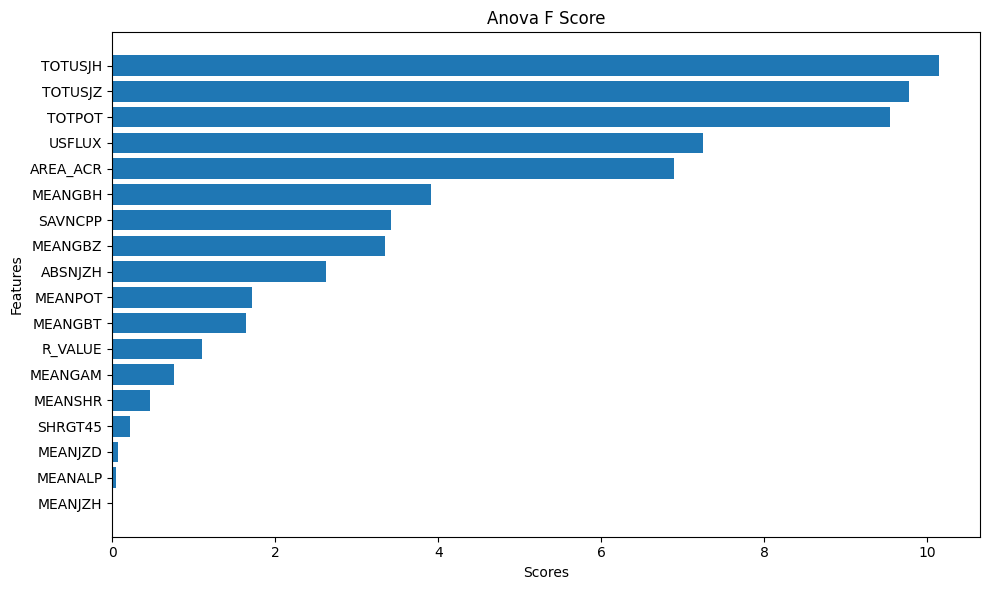

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [17]:
xdata_reordered = xdata.loc[:, ordered_features]

In [18]:
only_flares_1 = pd.DataFrame(xdata_reordered[ydata == 0])
flare_linked_1 = pd.DataFrame(xdata_reordered[ydata == 1])

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plotno = 1
columns_1 = xdata_reordered.columns
plt.figure(figsize=(14, 80),dpi =300)

min_only_flares_1 = only_flares_1.index.min()
max_only_flares_1 = only_flares_1.index.max()
only_flares_1['normalized_event_number'] = (only_flares_1.index - min_only_flares_1) / (max_only_flares_1 - min_only_flares_1)

min_flare_linked_1 = flare_linked_1.index.min()
max_flare_linked_1 = flare_linked_1.index.max()
flare_linked_1['normalized_event_number'] = (flare_linked_1.index - min_flare_linked_1) / (max_flare_linked_1 - min_flare_linked_1)

for i in range(len(columns_1) - 1):
    mean_only_flares_1 = np.mean(only_flares_1.iloc[:, i])
    mean_flare_linked_1 = np.mean(flare_linked_1.iloc[:, i])
    std_only_flares_1 = np.std(only_flares_1.iloc[:,i])
    std_flare_linked_1 = np.std(flare_linked_1.iloc[:,i])

    plt.subplot(len(columns_1), 2, plotno)
    plt.scatter(only_flares_1["normalized_event_number"], only_flares_1.iloc[:, i], alpha=0.7, label="Confined Flares")
    plt.scatter(flare_linked_1["normalized_event_number"], flare_linked_1.iloc[:, i], alpha=0.7, label="Eruptive Flares")
    plt.axhline(mean_only_flares_1, color='b', label=f"Mean Confined: {mean_only_flares_1:.2f}")
    plt.axhline(mean_flare_linked_1, color='r', label=f"Mean Eruptive: {mean_flare_linked_1:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(columns_1[i])
    plt.title(f"{columns_1[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns_1), 2, plotno + 1)
    plt.hist(only_flares_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Confined Flares")
    plt.hist(flare_linked_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Eruptive Flares")
    plt.axvline(mean_only_flares_1, color='b', label=f"Mean Confined flare: {mean_only_flares_1:.2f}")
    plt.axvline(mean_flare_linked_1, color='r', label=f"Mean Eruptive flare: {mean_flare_linked_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_only_flares_1 - std_only_flares_1, mean_only_flares_1 + std_only_flares_1, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_flare_linked_1 - std_flare_linked_1, mean_flare_linked_1 + std_flare_linked_1, color='r', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plotno += 2

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Taking only flares, only CME data, none of the events occured together here

In [20]:
only_flares = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_flares_36.csv")
only_cme = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_cme_36.csv")

In [21]:
data = pd.concat([only_flares,only_cme])
data = data.iloc[:,0:18]
ydata = pd.Series(np.concatenate((np.zeros(only_flares.shape[0]),np.ones(only_cme.shape[0]))))
columns = data.columns
data.reset_index(drop=True,inplace=True)

In [22]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,1.748676e+22,86.809,-0.005398,6107.613,20.115,974.343,37.806,-0.014116,37.002,87.949,-0.262190,1.906497e+13,3.886959e+12,2.221003e+23,30.611,427.937958,3.821,147.800
1,8.635886e+21,145.208,0.001882,3380.575,7.040,680.337,72.200,0.005321,34.328,144.410,0.482515,1.350948e+13,3.217496e+12,5.720140e+22,24.878,709.764587,3.426,23.975
2,2.208835e+22,77.458,0.003189,7058.576,21.203,1125.812,35.493,0.007476,36.119,83.284,-0.452133,2.088871e+13,7.186058e+12,2.921531e+23,28.830,564.053101,4.190,99.387
3,6.968897e+21,113.469,-0.002469,3649.218,10.467,464.259,53.387,-0.006300,32.995,120.948,-0.016955,9.377741e+12,2.097685e+12,4.741158e+22,27.293,199.341080,3.947,24.150
4,4.942875e+21,125.390,0.008944,5757.768,29.832,451.349,77.005,0.020892,49.604,125.230,0.113630,8.694789e+12,3.387658e+12,5.903152e+22,37.851,232.700699,3.404,69.051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1.815851e+22,64.404,-0.003391,12641.640,41.634,935.366,36.015,-0.006722,48.079,70.007,0.047142,1.781701e+13,2.268481e+12,4.573231e+23,41.021,513.920776,4.048,92.361
350,2.218802e+22,91.848,-0.005798,8562.980,29.102,1448.619,43.979,-0.013254,42.005,99.273,0.012779,2.926910e+13,6.310746e+12,3.827934e+23,36.053,720.935486,4.309,195.163
351,1.676506e+22,79.617,0.000515,3961.727,11.552,882.037,36.019,0.001302,31.858,82.634,-0.333858,1.557948e+13,4.127173e+12,1.263408e+23,25.484,361.408325,3.815,12.376
352,1.334912e+21,112.132,0.001759,3011.505,2.839,109.509,53.827,0.003823,30.800,111.477,0.648437,1.581656e+12,5.700270e+11,6.902982e+21,21.632,19.281916,2.790,3.036


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

xdata = pd.DataFrame(scaled_data, columns=columns)

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(xdata)
b = np.array(ydata)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[31.55371023  0.11197029  1.45106109 38.36095875 44.24467553 47.3958187
 43.02291104  0.61379545 46.30906518  4.16566898  0.98135168 47.80009479
 34.63241574 31.60351635 44.80363926 36.63938412 69.20620417 26.21124629]


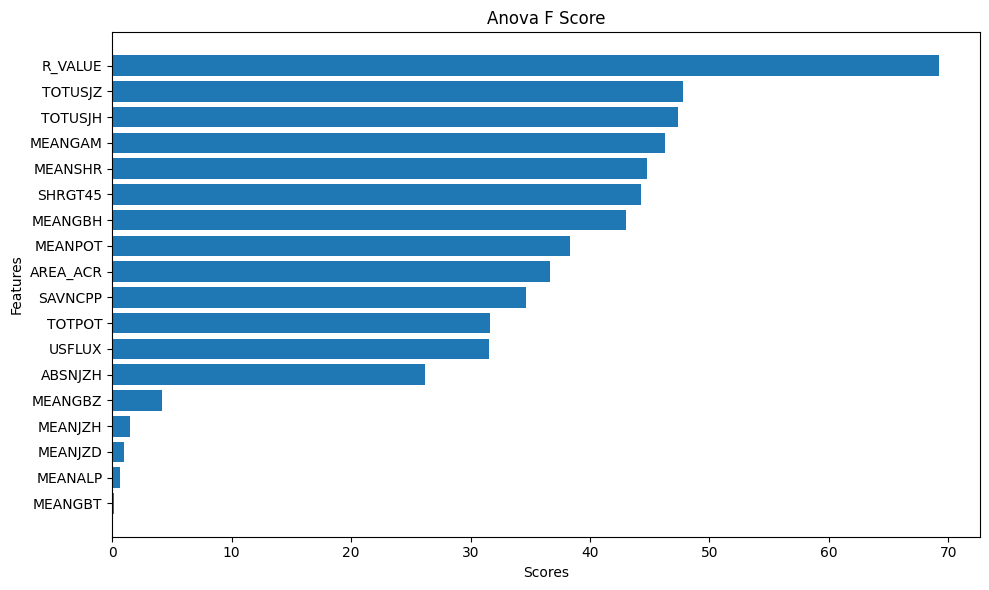

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [26]:
xdata_reordered = xdata.loc[:, ordered_features]

In [27]:
only_flares_1 = pd.DataFrame(xdata_reordered[ydata == 0])
only_cme_1 = pd.DataFrame(xdata_reordered[ydata == 1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plotno = 1
columns_1 = xdata_reordered.columns
plt.figure(figsize=(12, 80),dpi =300)

min_only_flares_1 = only_flares_1.index.min()
max_only_flares_1 = only_flares_1.index.max()
only_flares_1['normalized_event_number'] = (only_flares_1.index - min_only_flares_1) / (max_only_flares_1 - min_only_flares_1)

min_only_cme_1 = only_cme_1.index.min()
max_only_cme_1 = only_cme_1.index.max()
only_cme_1['normalized_event_number'] = (only_cme_1.index - min_only_cme_1) / (max_only_cme_1 - min_only_cme_1)

for i in range(len(columns_1) - 1):
    mean_only_flares_1 = np.mean(only_flares_1.iloc[:, i])
    mean_only_cme_1 = np.mean(only_cme_1.iloc[:, i])
    std_only_flares_1 = np.std(only_flares_1.iloc[:,i])
    std_only_cme_1 = np.std(only_cme_1.iloc[:,i])

    plt.subplot(len(columns_1), 2, plotno)
    plt.scatter(only_flares_1["normalized_event_number"], only_flares_1.iloc[:, i], alpha=0.7, label="Confined Flares")
    plt.scatter(only_cme_1["normalized_event_number"], only_cme_1.iloc[:, i], alpha=0.7, label="Flareless CMEs")
    plt.axhline(mean_only_flares_1, color='b', label=f"Mean Confined: {mean_only_flares_1:.2f}")
    plt.axhline(mean_only_cme_1, color='g', label=f"Mean Flareless: {mean_only_cme_1:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(columns_1[i])
    plt.title(f"{columns_1[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns_1), 2, plotno + 1)
    plt.hist(only_flares_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Confined Flares")
    plt.hist(only_cme_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Flareless CMEs")
    plt.axvline(mean_only_flares_1, color='b', label=f"Mean Confined flare: {mean_only_flares_1:.2f}")
    plt.axvline(mean_only_cme_1, color='g', label=f"Mean Flareless CME: {mean_only_cme_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_only_flares_1 - std_only_flares_1, mean_only_flares_1 + std_only_flares_1, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_only_cme_1 - std_only_cme_1, mean_only_cme_1 + std_only_cme_1, color='g', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plotno += 2

plt.tight_layout()
plt.show()

# Taking only CME data (eruptive flare and flareless cme)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
flare_linked = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/flare_linked_36.csv")
only_cme = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/flare_cme_association/refs/heads/main/Inceoglu/jsoc/only_cme_36.csv")

In [ ]:
data = pd.concat([flare_linked,only_cme])
data = data.iloc[:,0:18]
ydata = pd.Series(np.concatenate((np.zeros(flare_linked.shape[0]), np.ones(only_cme.shape[0]))))
columns = data.columns
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH
0,8.791259e+21,105.781,-0.010057,7081.965,29.832,594.301,52.214,-0.027459,43.403,105.840,0.171251,1.260025e+13,3.685726e+12,1.347478e+23,35.571,471.387878,3.310,144.084
1,1.742542e+22,110.305,0.026915,13063.930,52.876,2575.372,83.372,0.060647,59.751,119.750,0.099125,4.481985e+13,2.628062e+13,5.098315e+23,49.919,776.300354,4.728,790.906
2,2.760337e+22,91.339,-0.004361,10385.640,42.248,1804.829,52.444,-0.008711,48.924,96.108,0.112286,3.581158e+13,6.303004e+12,5.487936e+23,41.769,967.674744,4.254,173.529
3,5.712703e+22,93.323,0.007753,10983.510,34.062,4354.476,53.287,0.016056,44.227,103.374,0.052544,8.294327e+13,3.932825e+13,1.188865e+24,38.558,2116.946533,5.082,631.900
4,2.318090e+22,114.006,0.008869,4568.461,18.244,1608.422,52.416,0.027315,37.849,115.458,0.120277,3.347183e+13,1.880204e+13,2.251023e+23,30.918,1095.482422,4.303,329.059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,1.815851e+22,64.404,-0.003391,12641.640,41.634,935.366,36.015,-0.006722,48.079,70.007,0.047142,1.781701e+13,2.268481e+12,4.573231e+23,41.021,513.920776,4.048,92.361
217,2.218802e+22,91.848,-0.005798,8562.980,29.102,1448.619,43.979,-0.013254,42.005,99.273,0.012779,2.926910e+13,6.310746e+12,3.827934e+23,36.053,720.935486,4.309,195.163
218,1.676506e+22,79.617,0.000515,3961.727,11.552,882.037,36.019,0.001302,31.858,82.634,-0.333858,1.557948e+13,4.127173e+12,1.263408e+23,25.484,361.408325,3.815,12.376
219,1.334912e+21,112.132,0.001759,3011.505,2.839,109.509,53.827,0.003823,30.800,111.477,0.648437,1.581656e+12,5.700270e+11,6.902982e+21,21.632,19.281916,2.790,3.036


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

xdata = pd.DataFrame(scaled_data, columns=columns)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(xdata)
b = np.array(ydata)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)

[19.7807461   0.47668549  1.26799112 19.18405761 27.15194806 24.72578992
 15.96386051  0.22349067 25.6077177   0.08374563  0.63886516 24.70533676
 48.1039515  15.1073501  26.07221892 20.24186402 36.16280836 38.09210898]


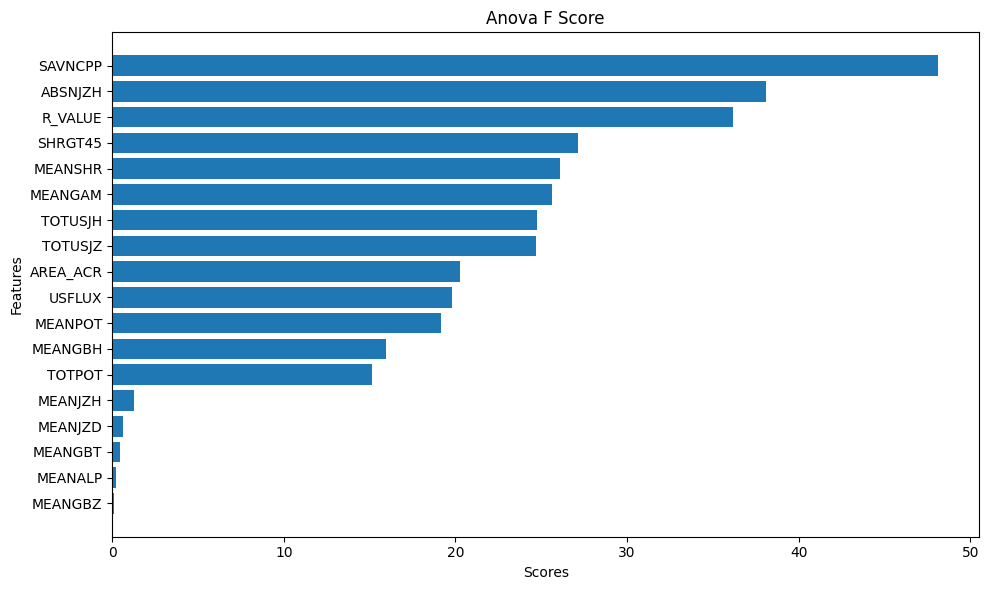

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()

In [ ]:
xdata_reordered = xdata.loc[:, ordered_features]

In [ ]:
flare_linked_1 = pd.DataFrame(xdata_reordered[ydata == 0])
only_cme_1 = pd.DataFrame(xdata_reordered[ydata == 1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plotno = 1
columns_1 = xdata_reordered.columns
plt.figure(figsize=(14, 80),dpi =300)

min_flare_linked_1 = flare_linked_1.index.min()
max_flare_linked_1 = flare_linked_1.index.max()
flare_linked_1['normalized_event_number'] = (flare_linked_1.index - min_flare_linked_1) / (max_flare_linked_1 - min_flare_linked_1)

min_only_cme_1 = only_cme_1.index.min()
max_only_cme_1 = only_cme_1.index.max()
only_cme_1['normalized_event_number'] = (only_cme_1.index - min_only_cme_1) / (max_only_cme_1 - min_only_cme_1)

for i in range(len(columns_1) - 1):
    mean_flare_linked_1 = np.mean(flare_linked_1.iloc[:, i])
    mean_only_cme_1 = np.mean(only_cme_1.iloc[:, i])
    std_flare_linked_1 = np.std(flare_linked_1.iloc[:,i])
    std_only_cme_1 = np.std(only_cme_1.iloc[:,i])

    plt.subplot(len(columns_1), 2, plotno)
    plt.scatter(flare_linked_1["normalized_event_number"], flare_linked_1.iloc[:, i], alpha=0.7, label="Eruptive Flares")
    plt.scatter(only_cme_1["normalized_event_number"], only_cme_1.iloc[:, i], alpha=0.7, label="Flareless CMEs")
    plt.axhline(mean_flare_linked_1, color='r', label=f"Mean Eruptive: {mean_flare_linked_1:.2f}")
    plt.axhline(mean_only_cme_1, color='g', label=f"Mean Flareless: {mean_only_cme_1:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(columns_1[i])
    plt.title(f"{columns_1[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns_1), 2, plotno + 1)
    plt.hist(flare_linked_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Eruptive Flares")
    plt.hist(only_cme_1.iloc[:, i], bins=20, density=True, alpha=0.7, label="Flareless CMEs")
    plt.axvline(mean_flare_linked_1, color='r', label=f"Mean Eruptive flare : {mean_flare_linked_1:.2f}")
    plt.axvline(mean_only_cme_1, color='g', label=f"Mean Flareless CME: {mean_only_cme_1:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_flare_linked_1 - std_flare_linked_1, mean_flare_linked_1 + std_flare_linked_1, color='r', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_only_cme_1 - std_only_cme_1, mean_only_cme_1 + std_only_cme_1, color='g', alpha=0.2)
    plt.xlabel(columns_1[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {columns_1[i]}')
    plt.legend()

    plotno += 2

plt.tight_layout()
plt.show()